In [1]:
import pickle
import argparse
parser = argparse.ArgumentParser()
from trainer import Trainer 
from const import * 
import pandas as pd



manifold =  LORENTZ 
model = HS4
dataset =  TWITTER16 
max_sent_len = 30 
max_com_len = 30 
max_sents = 30 
max_coms = 30 
lr =  0.001 
fourier = False 
curv = 1.0 
enable_log =  False 
embedding_dim = 200 


file = open(f'{DATA_PATH}/{dataset}/{dataset}_preprocessed.pkl', 'rb')
df = pd.read_csv(f'{DATA_PATH}/{dataset}/{dataset}.csv') 
props = pickle.load(file)

id_train, id_test = props['train']['id'], props['val']['id']
raw_c_train, raw_c_val = list(df[df['id'].isin(id_train)]['comments']), list(df[df['id'].isin(id_test)]['comments'])
raw_c_train = [c.split('::') if isinstance(c, str) else '' for c in raw_c_train]
raw_c_val= [c.split('::') if isinstance(c, str) else '' for c in raw_c_val]
x_train, x_val = props['train']['x'], props['val']['x']
y_train, y_val = props['train']['y'], props['val']['y']
c_train, c_val = props['train']['c'], props['val']['c']
sub_train, sub_val = props['train']['subgraphs'], props['val']['subgraphs']



trainer = Trainer(
    manifold=manifold,
    model_type=model,
    platform=dataset, 
    max_sen_len=max_sent_len, 
    max_com_len=max_com_len, 
    max_sents=max_sents, 
    max_coms=max_coms, 
    lr = lr, 
    fourier = fourier,
    curv=curv,
    enable_log=enable_log,
    embedding_dim=int(embedding_dim)
)



/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:104: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=th.float16)
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:128: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dZ):
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:177: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=th.float16)
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:207: FutureWarning: `torch.cuda.amp.custom_bwd(args...)

init k 1.0
using manifold  lorentz
using fourier False


/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))

In [2]:
# trainer.run(
#     train_x=x_train, 
#     train_y=y_train, 
#     train_c=c_train, 
#     train_raw_c=raw_c_train, 
#     val_x=x_val, 
#     val_y=y_val, 
#     val_c=c_val, 
#     val_raw_c=raw_c_val, 
#     sub_train=sub_train, 
#     sub_val=sub_val, 
#     batch_size=32, 
#     epochs=100,
#     eval=True
# )


saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
lorentz 1.0
hs4 built
Encoding texts....
preparing dataset....
Dataset prepared.
Model loaded successfully.


/home/jupyter-iec_chau/chau/Hyphen/trainer.py:772: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(model_path))


torch.Size([960, 201])
torch.Size([32, 201])
torch.Size([960, 201])
torch.Size([32, 201])
torch.Size([32, 401])
torch.Size([32, 1, 30])
fitting document-level reducer
fitting sentence-level reducer
init k 1
init k 1
init k 1


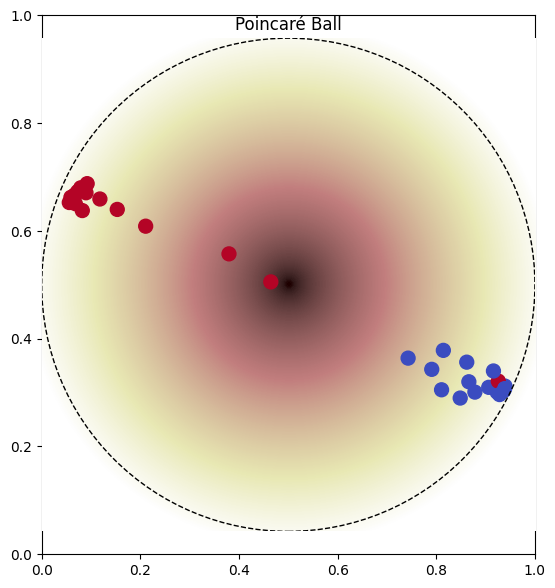

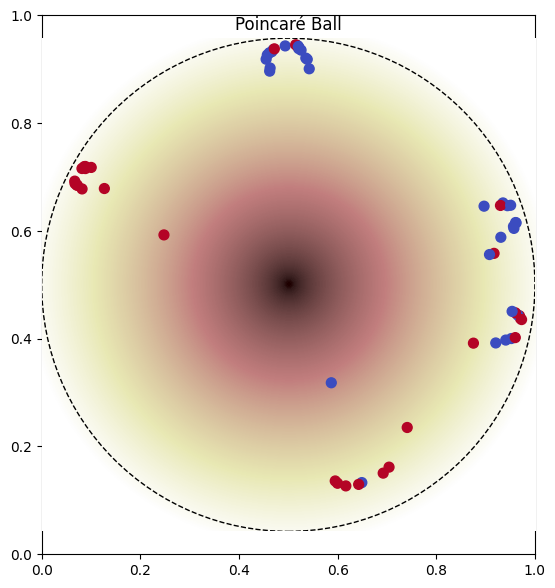

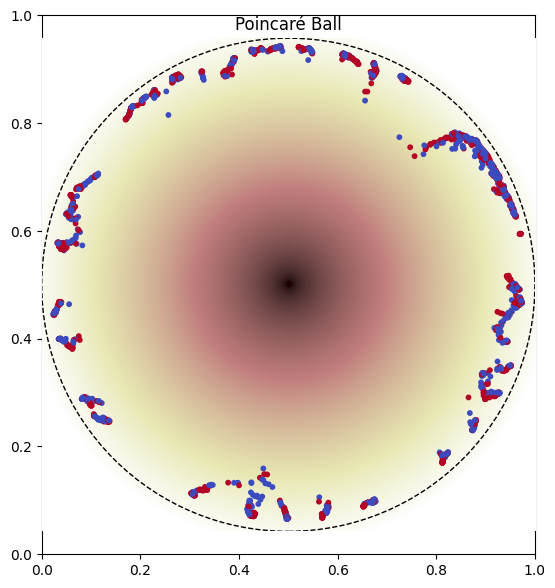

In [3]:
fig_co, fig_co_s, fig_s = trainer.run(
# fig_co = trainer.run(
    train_x=x_train, 
    train_y=y_train, 
    train_c=c_train, 
    train_raw_c=raw_c_train, 
    val_x=x_val, 
    val_y=y_val, 
    val_c=c_val, 
    val_raw_c=raw_c_val, 
    sub_train=sub_train, 
    sub_val=sub_val, 
    batch_size=32, 
    epochs=100,
    eval=False,
    visualize=True
)


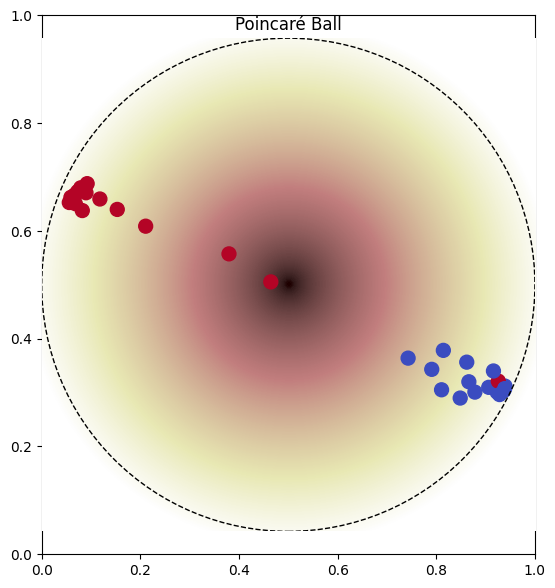

In [4]:
fig_co

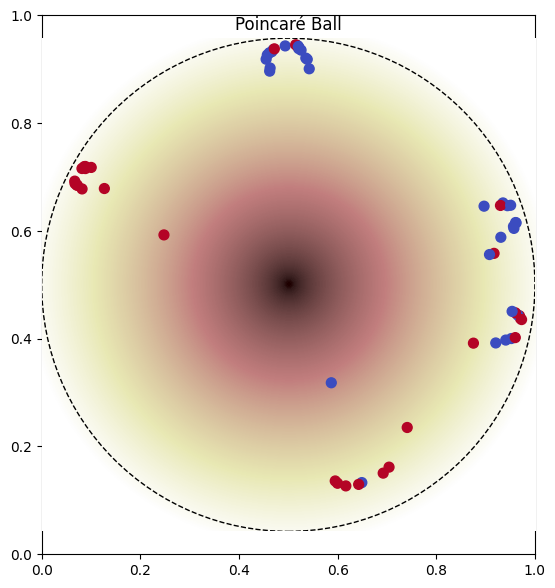

In [5]:
fig_co_s

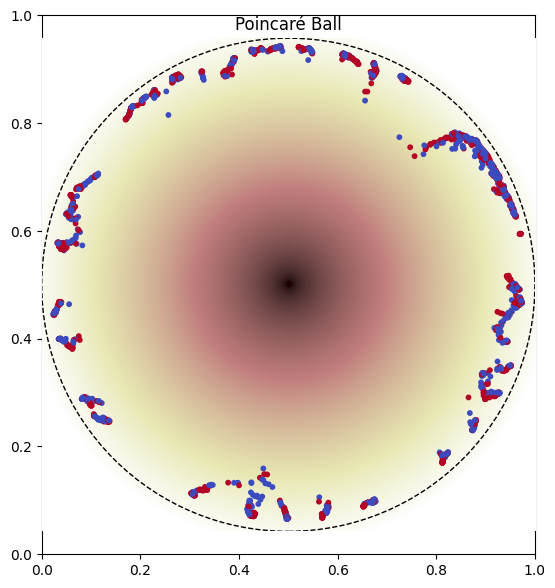

In [6]:
fig_s

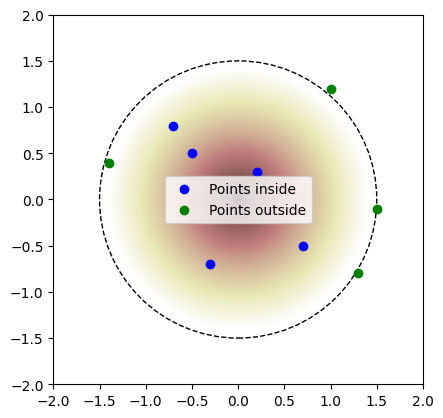

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Create a grid of points inside a circle
n = 500 
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)

# Compute the distance from the center for each point (radial distance)
Z = np.sqrt(X**2 + Y**2) 

# Create the gradient (e.g., radial gradient, normalized by maximum distance)
Z = Z * 1.5/ np.max(Z)

# Mask values outside the circle
mask = Z <= 1  # Only show inside the circle

# Set the background color for outside the circle
gradient_color = np.ones_like(Z)
gradient_color[mask] = Z[mask]

# Plot the gradient using imshow
ax.imshow(gradient_color, extent=(-1.5, 1.5, -1.5, 1.5), origin='upper', cmap='pink')

# Add a circular boundary
circle = plt.Circle((0, 0), 1.5, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(circle)

# Plot scatter points inside and outside the circle
points_inside_circle = np.array([
    [-0.5, 0.5], [0.2, 0.3], [-0.3, -0.7], [0.7, -0.5], [-0.7, 0.8]
])
points_outside_circle = np.array([
    [1.0, 1.2], [1.3, -0.8], [-1.4, 0.4], [1.5, -0.1]
])

# Plot scatter points
ax.scatter(points_inside_circle[:, 0], points_inside_circle[:, 1], color='blue', label='Points inside')
ax.scatter(points_outside_circle[:, 0], points_outside_circle[:, 1], color='green', label='Points outside')

# Set aspect ratio to be equal
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Display plot
plt.legend()
plt.show()
